In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import numpy as np
import math

plt.rcParams["figure.figsize"] = (40,6)




import warnings
warnings.filterwarnings('ignore')

In [2]:
__=pd.read_csv('./terrorism_new.csv',encoding='ISO-8859-1')

In [3]:
terror=__
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [8]:
region_list = ['Central America & Caribbean', 'Middle East & North Africa', 
               'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
attack_list = terror.groupby('AttackType').size().index.tolist()

print(region_list)
print(attack_list)



['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']
['Central America & Caribbean', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']


In [9]:
attack_region_dict = terror.groupby(['Region', 'AttackType']).size().to_dict()
print(attack_region_dict)

{('Australasia & Oceania', 'Armed Assault'): 53, ('Australasia & Oceania', 'Assassination'): 36, ('Australasia & Oceania', 'Bombing/Explosion'): 75, ('Australasia & Oceania', 'Facility/Infrastructure Attack'): 91, ('Australasia & Oceania', 'Hijacking'): 3, ('Australasia & Oceania', 'Hostage Taking (Barricade Incident)'): 6, ('Australasia & Oceania', 'Hostage Taking (Kidnapping)'): 13, ('Australasia & Oceania', 'Unarmed Assault'): 11, ('Australasia & Oceania', 'Unknown'): 16, ('Central America & Caribbean', 'Armed Assault'): 4366, ('Central America & Caribbean', 'Assassination'): 1256, ('Central America & Caribbean', 'Bombing/Explosion'): 3240, ('Central America & Caribbean', 'Facility/Infrastructure Attack'): 404, ('Central America & Caribbean', 'Hijacking'): 26, ('Central America & Caribbean', 'Hostage Taking (Barricade Incident)'): 187, ('Central America & Caribbean', 'Hostage Taking (Kidnapping)'): 506, ('Central America & Caribbean', 'Unarmed Assault'): 19, ('Central America & Cari

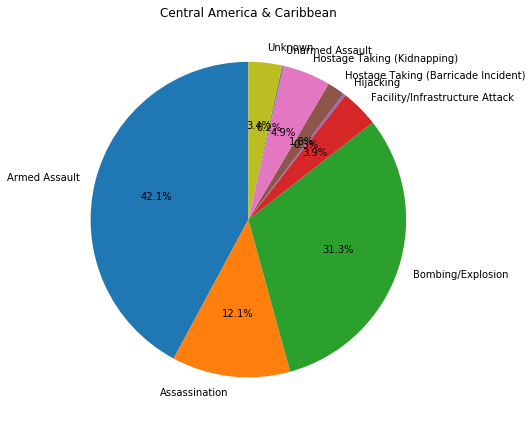

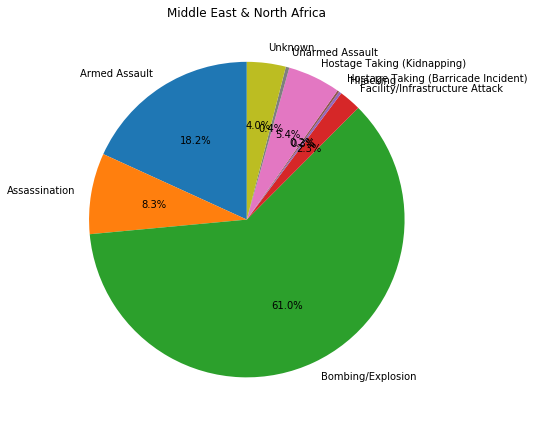

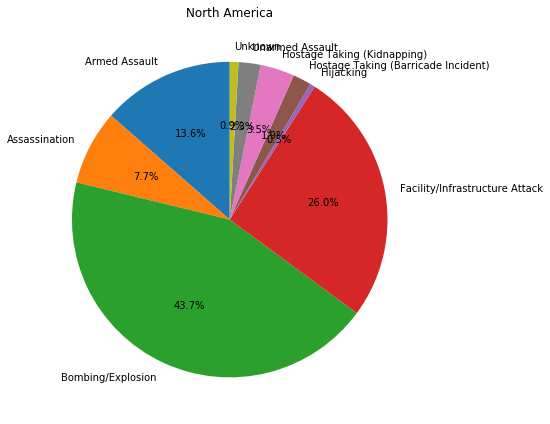

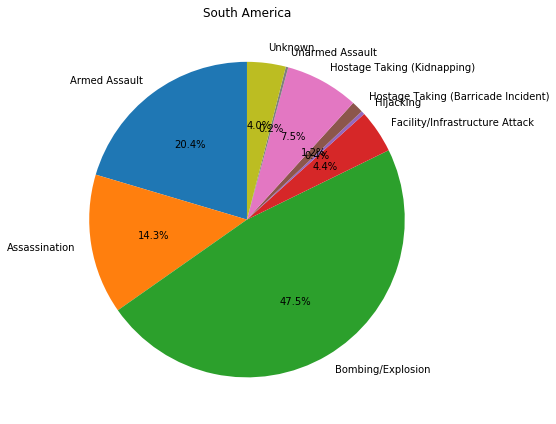

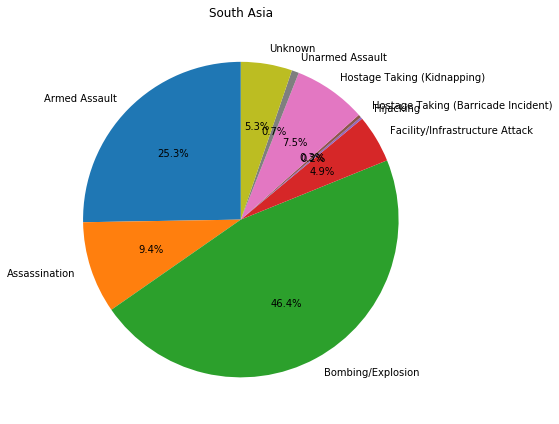

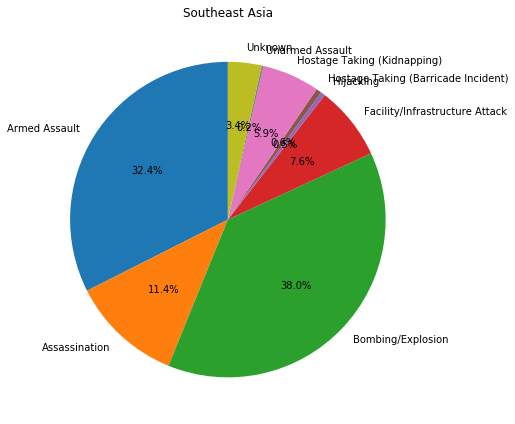

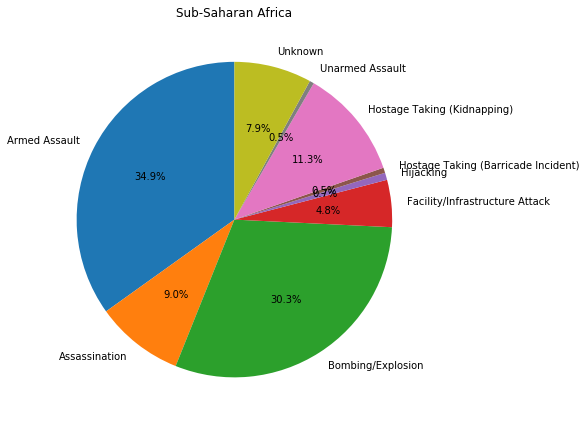

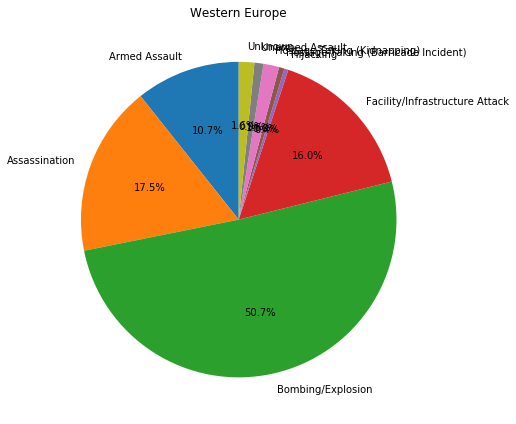

In [40]:
size = [0] * len(attack_list)
ind = list(range(len(attack_list)))
attack_index = {key: value for key, value in zip(attack_list, ind)}

for r in region_list:
    labels = attack_list
    

    
    for a in attack_list:
        val = attack_region_dict.get((r,a), None)
        if val:
            count = size[attack_index[a]]
            count += val
            size.pop(attack_index[a])
            size.insert(attack_index[a], val)


    fig1, ax1 = plt.subplots()

    cs=cm.Set1(np.arange(40)/40.)
    ax1.pie(size, labels=labels,autopct='%1.1f%%', startangle=90)
    ax1.set_title(str(r))
    plt.tight_layout()
    plt.savefig("country_attacks/"+ str(r) +'.png')
    plt.show()
    
    

In [28]:
import imageio
import os
print(os.getcwd())
pieanimation = os.getcwd() + "/pieanimation"

files = []

for filename in os.listdir(pieanimation):
    filename = pieanimation + "/" + filename
    files.append(filename)

files.sort()

images = []
for f in files:
    print(f)
    images.append(imageio.imread(f))

imageio.mimsave('movie.gif', images, duration=0.4)

/Users/yeeeeehan/Desktop/CZ 4032/Project
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/.DS_Store


ValueError: Could not find a format to read the specified file in mode 'i'

In [39]:
# ffmpeg -f image2 -r 5 -pattern_type glob -i '*.png' -vcodec mpeg4 -y 5.mp4

32512

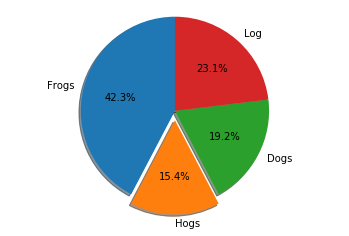

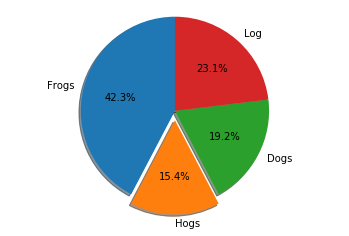

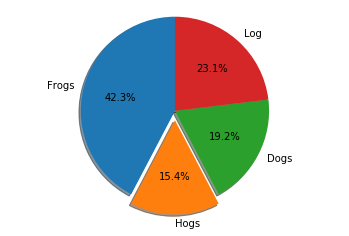

In [19]:
for i in range(3):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Frogs', 'Hogs', 'Dogs', 'Log'
    sizes = [11,4, 5 ,6]
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.savefig(str(i) +'.png')
    plt.show()
